## For this .ipynb, I follow Alan's GitHub.
https://github.com/alan200276/SVJ/blob/master/Instruction/LHE_Record.ipynb

## Import Packages

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pylhe

%config InlineBackend.figure_format = 'retina'  # increase figure showing resolution

## Define Mass Functions

In [2]:
def invariant_mass(p1, p2):
    return math.sqrt(sum((1 if mu=='e' else -1)*(getattr(p1,mu)+getattr(p2,mu))**2 for mu in ['e','px','py','pz']))
def transverse_mass(p1):
    return math.sqrt(sum((1 if mu=='e' else -1)*(getattr(p1,mu))**2 for mu in ['e','pz']))

#### Note:
 \begin{align}
 & p_\mu p^\mu = \frac{E^2}{c^2}-\vec{p}^2=m^2c^2 \\
 &\Rightarrow m^2=E^2-\vec{p}^2
 \end{align}
Transverse mass with $c=1$
 \begin{align}
 m_T^2 = m^2+p_x^2+p_y^2=E^2-p_z^2 \\
 \end{align}

## Create a Event List and extract interesting informations

In [3]:
process_path_MZ_1000 = '/youwei_home/SVJ_py/Tutorial_v2/s_channel0/Events/run_01/unweighted_events.lhe'
process_path_MZ_1500 = '/youwei_home/SVJ_py/Tutorial_v2/s_channel0/Events/run_02/unweighted_events.lhe'
process_path_MZ_2000 = '/youwei_home/SVJ_py/Tutorial_v2/s_channel0/Events/run_03/unweighted_events.lhe'
process_path_MZ_100000 = '/youwei_home/SVJ_py/Tutorial_v2/s_channel0/Events/run_04/unweighted_events.lhe'
# process_path_MZ_1500 = '/youwei_home/SVJ_py/Tutorial/LHE/0.lhe'
s_channel0_1000 = pylhe.readLHE(process_path_MZ_1000)
s_channel0_1500 = pylhe.readLHE(process_path_MZ_1500)
s_channel0_2000 = pylhe.readLHE(process_path_MZ_2000)
s_channel0_100000 = pylhe.readLHE(process_path_MZ_100000)

event_1000, event_1500, event_2000, event_100000 = [], [], [], []

for event in s_channel0_1000:
    event_1000.append(event)
    
for event in s_channel0_1500:
    event_1500.append(event)
    
for event in s_channel0_2000:
    event_2000.append(event)
    
for event in s_channel0_100000:
    event_100000.append(event)

### <font color=red> Notice: Here, I first pick $M_{Z^\prime}=1500$ as example. </font>

In [4]:
print(dir(event_1500[0]))
print('-'*147)
print(dir(event_1500[0].particles))
print('-'*147)
print(dir(event_1500[0].particles.index))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'attributes', 'eventinfo', 'particles', 'weights']
---------------------------------------------------------------------------------------------------------------------------------------------------
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshoo

#### Note: These are not interesting informations.

In [5]:
dir(event_1500[0].particles[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'color1',
 'color2',
 'e',
 'event',
 'fieldnames',
 'fromstring',
 'id',
 'lifetime',
 'm',
 'mother1',
 'mother2',
 'mothers',
 'px',
 'py',
 'pz',
 'spin',
 'status']

#### Note: I have four ways to extract interesting informations.

In [6]:
event_1500[0]

In [7]:
event_1500[0].particles

In [8]:
# Approach 1
for i in range(len(event_1500[0].particles)):
    print(event_1500[0].particles[i].status)

-1.0
-1.0
2.0
1.0
1.0


In [9]:
# Approach 2
[i.status for i in event_1500[0].particles]  # particle status for first event (Parton level)

[-1.0, -1.0, 2.0, 1.0, 1.0]

In [10]:
# Approach 3
test_status = []
for i in event_1500[0].particles:
    test_status.append(i.status)
print(test_status)

# Approach 4
for i in range(5):
    print(getattr(event_1500[0].particles[i], 'status'))

[-1.0, -1.0, 2.0, 1.0, 1.0]
-1.0
-1.0
2.0
1.0
1.0


#### Note: More test

In [11]:
# Approach 2
print([i.mother2 for i in event_1500[1].particles])
print([i.e for i in event_1500[1].particles])
print([i.pz for i in event_1500[1].particles])

[0.0, 0.0, 2.0, 3.0, 3.0, 2.0]
[895.97717249, 925.69843278, 1539.6027964, 720.65647321, 818.94632319, 282.07280887]
[895.97717249, -925.69843278, 169.23520096, 68.728932701, 100.50626826, -198.95646125]


In [12]:
# Approach 3
test_mother2, test_e, test_pz = [], [], []
for i in event_1500[1].particles:
    test_mother2.append(i.mother2)
    test_e.append(i.e)
    test_pz.append(i.pz)
print(test_mother2)
print(test_e)
print(test_pz)
print('-'*87)


# Approach 4
test_mother2, test_e, test_pz = [], [], []
for i in range(len(event_1500[1].particles)):
    test_mother2.append(getattr(event_1500[1].particles[i], 'mother2'))
    test_e.append(getattr(event_1500[1].particles[i], 'e'))
    test_pz.append(getattr(event_1500[1].particles[i], 'pz'))
print(test_mother2)
print(test_e)
print(test_pz)

[0.0, 0.0, 2.0, 3.0, 3.0, 2.0]
[895.97717249, 925.69843278, 1539.6027964, 720.65647321, 818.94632319, 282.07280887]
[895.97717249, -925.69843278, 169.23520096, 68.728932701, 100.50626826, -198.95646125]
---------------------------------------------------------------------------------------
[0.0, 0.0, 2.0, 3.0, 3.0, 2.0]
[895.97717249, 925.69843278, 1539.6027964, 720.65647321, 818.94632319, 282.07280887]
[895.97717249, -925.69843278, 169.23520096, 68.728932701, 100.50626826, -198.95646125]


In [13]:
[i.event for i in event_1500[0].particles]

In [14]:
for n in range(6):
    for i, particle in enumerate(event_1500[n].particles):
        if particle.id == 4900101:
            p1 = event_1500[n].particles[i]
            print(i+1, getattr(p1,'e'))
        elif particle.id == -4900101:
            p2 = event_1500[n].particles[i]
            print(i+1, getattr(p2,'e'))
    print('-'*14)

4 395.78828941
5 1585.2289111
--------------
4 720.65647321
5 818.94632319
--------------
4 602.74816302
5 1966.1877604
--------------
4 567.89151372
5 1428.5730586
--------------
4 681.49183007
5 843.59241837
--------------
4 441.072614
5 1215.4037075
--------------


In [15]:
print('{:^12}{:^9}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}'.format('#','id','mother1','mother2','e','px','py','pz','status'))

for n in range(6):
    for i, element in enumerate(event_1500[n].particles):
        print('{:^12}{:^9.0f}{:^12.0f}{:^12.0f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.0f}'
          .format(i+1, element.id, element.mother1, element.mother2, element.e, element.px, element.py, element.pz, element.status))
    print('-'*102)

     #         id      mother1     mother2        e           px          py          pz        status   
     1         -2         0           0        323.690      -0.000      0.000      323.690        -1     
     2          2         0           0        1657.328     0.000       -0.000    -1657.328       -1     
     3       5000001      1           2        1981.017     0.000       0.000     -1333.638       2      
     4       4900101      3           3        395.788     152.170     294.075     216.592        1      
     5      -4900101      3           3        1585.229    -152.170    -294.075   -1550.231       1      
------------------------------------------------------------------------------------------------------
     1         -2         0           0        895.977      -0.000      0.000      895.977        -1     
     2          2         0           0        925.698      0.000       -0.000     -925.698       -1     
     3       5000001      1           2        15

#### Note: How many particles in each event?

In [16]:
# Total number of event
print(len(event_1000))
print(len(event_1500))
print(len(event_2000))
print(len(event_100000))

20000
20000
20000
20000


In [17]:
for n in range(20):
    print(len(event_1500[n].particles))

5
6
5
5
5
6
5
5
5
5
5
6
5
4
6
5
5
6
5
7


#### Note: We can therefore find each event number is not the same.

## Check all events only have a 5000001, 4900101, and -4900101 for $M_{Z^\prime}=1500$

In [18]:
nevents = len(event_1500)
acc_50 = 0
acc_p49 = 0
acc_m49 = 0
for n in range(nevents):
    for i, particle in enumerate(event_1500[n].particles):
        if particle.id == 5000001:
            acc_50 += 1
        elif particle.id == 4900101:
            acc_p49 += 1
        elif particle.id == -4900101:
            acc_m49 += 1
            
print(acc_50, acc_p49, acc_m49)

19394 20000 20000


#### Note: We can know they have no all events including $Z^\prime$. But this way is not good!!
Thus, some events are off-shell.  
And for this method, we cannot make sure each event only has one 5000001, 4900101, and -4900101.

## Create Mass List and Plot Mass diagram

In [19]:
m_1500, mT_1500 = [], []
nevents = len(event_1500)
for n in range(nevents):
    for i, particle in enumerate(event_1500[n].particles):
        if particle.id == 4900101:
            p1 = event_1500[n].particles[i]
        elif particle.id == -4900101:
            p2 = event_1500[n].particles[i]
            
    m_1500.append(invariant_mass(p1,p2))
    
m_1500 = np.array(m_1500)

In [20]:
m_1000, m_2000, m_100000 = [], [], []
nevents_1000 = len(event_1000)
nevents_2000 = len(event_2000)
nevents_100000 = len(event_100000)
for n in range(nevents_1000):
    for i, particle in enumerate(event_1000[n].particles):
        if particle.id == 4900101:
            p1 = event_1000[n].particles[i]
        elif particle.id == -4900101:
            p2 = event_1000[n].particles[i]
    m_1000.append(invariant_mass(p1,p2))
    
    
for n in range(nevents_2000):
    for i, particle in enumerate(event_2000[n].particles):
        if particle.id == 4900101:
            p1 = event_2000[n].particles[i]
        elif particle.id == -4900101:
            p2 = event_2000[n].particles[i]
    m_2000.append(invariant_mass(p1,p2))
    
    
for n in range(nevents_100000):
    for i, particle in enumerate(event_100000[n].particles):
        if particle.id == 4900101:
            p1 = event_100000[n].particles[i]
        elif particle.id == -4900101:
            p2 = event_100000[n].particles[i]
    m_100000.append(invariant_mass(p1,p2))
    
    
m_1000 = np.array(m_1000)
m_2000 = np.array(m_2000)
m_100000 = np.array(m_100000)

In [21]:
print(m_1500)
print(m_100000)

[1464.86814139 1517.15352598 1535.65076164 ...  682.6367092  1502.33759756
 1444.88970089]
[ 998.75575607 2698.85165509  894.39631211 ...  963.69812842 2896.77112422
 2101.26647592]


### 1. $M_{Z^\prime}=1500$ GeV

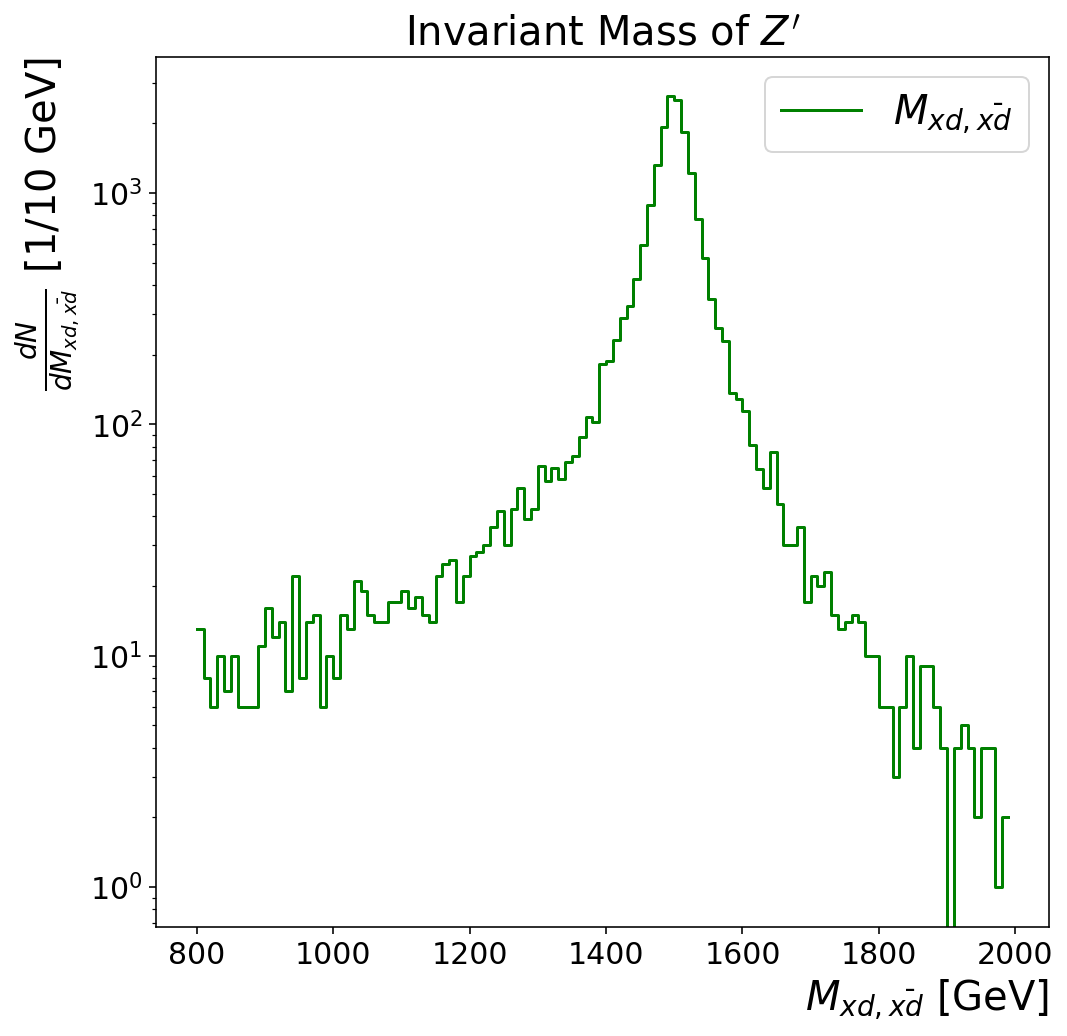

In [22]:
plt.figure(figsize=(8,8))  # plot size

bin_size = np.linspace(800,2000,121)
hist, bins = np.histogram(m_1500, bins=bin_size)

plt.step(bins[:-1], hist, where='post', color='green', label='$M_{xd,\\bar{xd}}$')

plt.legend(fontsize=20)
plt.yscale('log')
plt.title('Invariant Mass of $Z^\prime$', fontsize=20)
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dM_{xd,\\bar{xd}}}$ [1/10 GeV]', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Note: average invariant mass, total event number, and area of diagram

In [23]:
sum(m_1500)/nevents

1453.740459436843

In [24]:
print(sum(hist))
bin_size = np.linspace(0,3600,361)
hist, bins = np.histogram(m_1500, bins=bin_size)
print(sum(hist))

19353
20000


#### Note: y-axis can also label to 'Events/10 GeV'

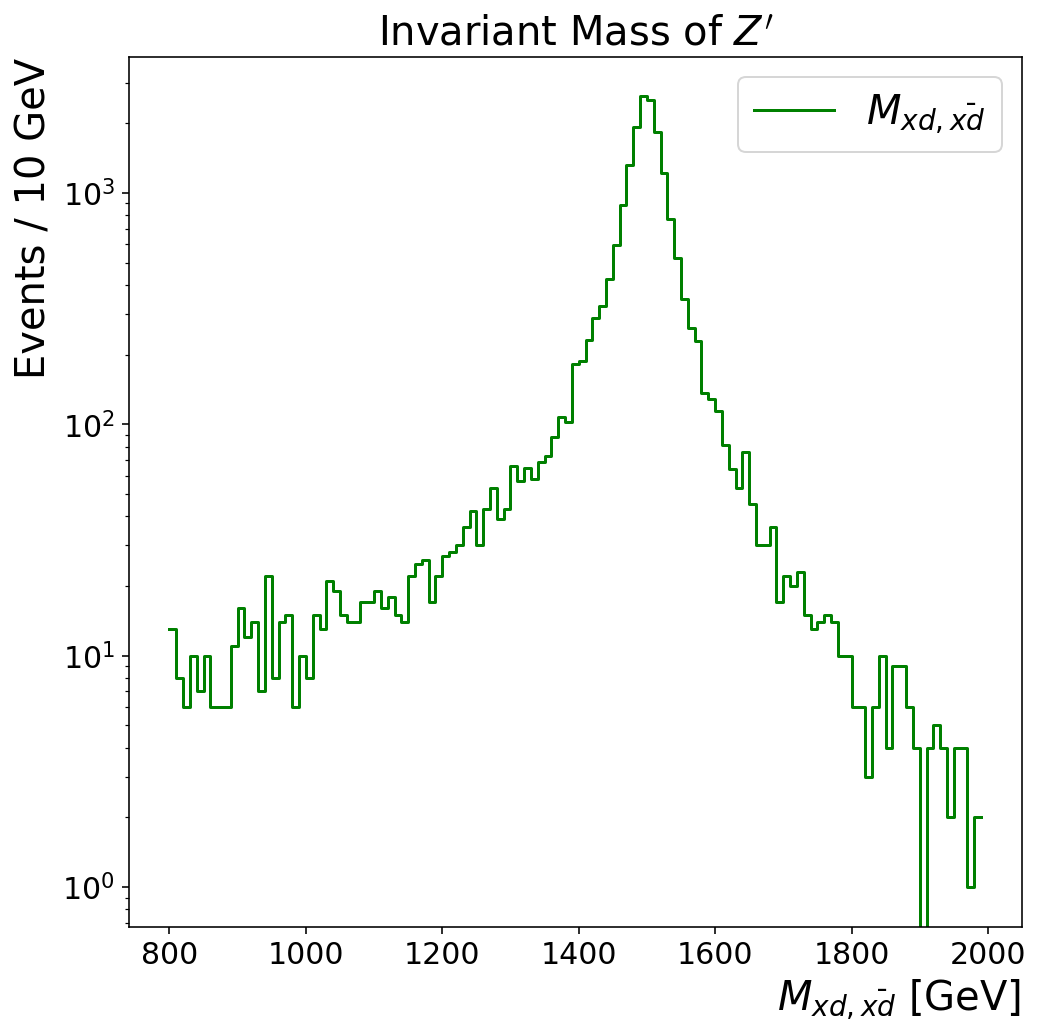

In [25]:
plt.figure(figsize=(8,8))  # plot size

bin_size = np.linspace(800,2000,121)
hist, bins = np.histogram(m_1500, bins=bin_size)

plt.step(bins[:-1], hist, where='post', color='green', label='$M_{xd,\\bar{xd}}$')

plt.legend(fontsize=20)
plt.yscale('log')
plt.title('Invariant Mass of $Z^\prime$', fontsize=20)
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('Events / 10 GeV', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Note: Compare the two approachs

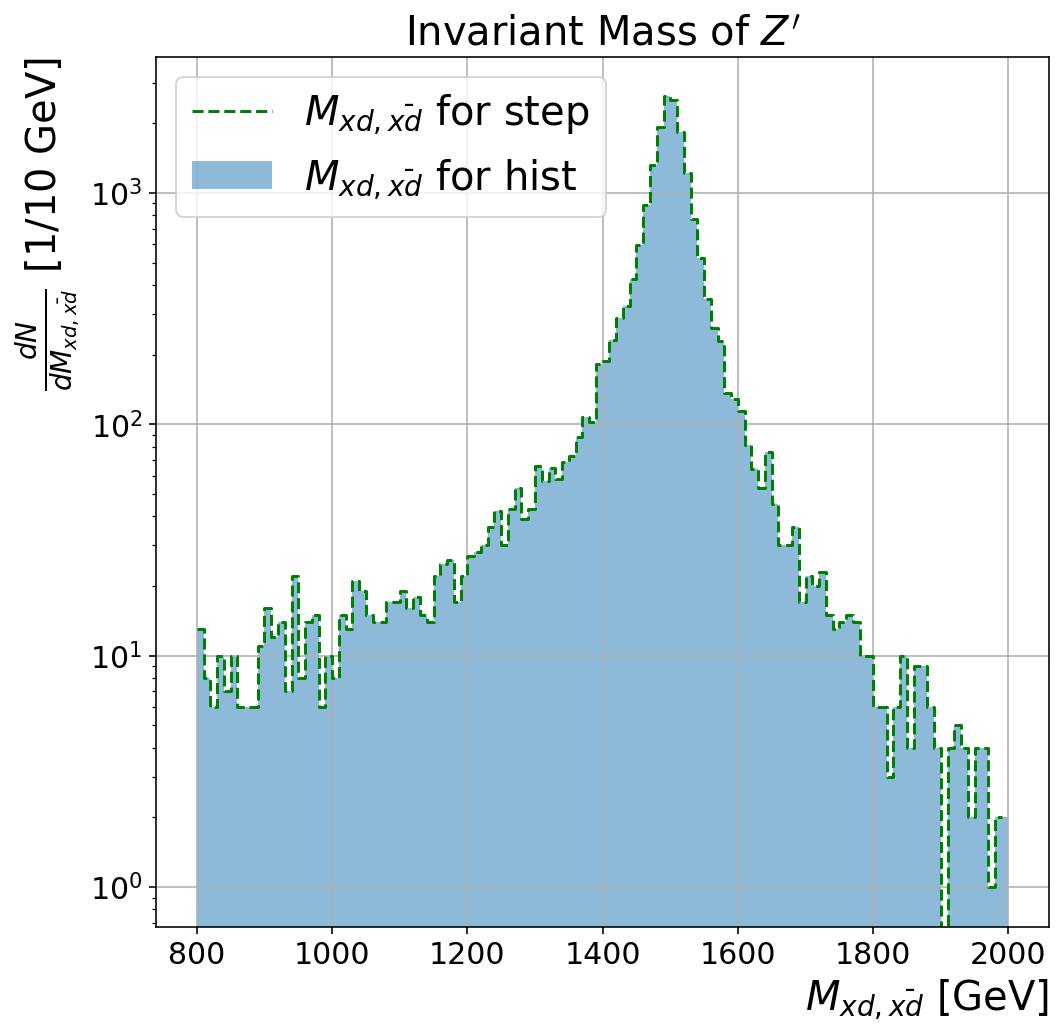

In [26]:
plt.figure(figsize=(8,8))  # plot size

bin_size = np.linspace(800,2000,121)
hist, bins = np.histogram(m_1500, bins=bin_size)

plt.step(bins[:-1], hist, where='post', color='green', label='$M_{xd,\\bar{xd}}$ for step', linestyle='--')
plt.hist(m_1500, bins=bin_size, alpha=0.5, label='$M_{xd,\\bar{xd}}$ for hist')

plt.legend(fontsize=20)
plt.yscale('log')
plt.title('Invariant Mass of $Z^\prime$', fontsize=20)
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dM_{xd,\\bar{xd}}}$ [1/10 GeV]', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

### 2. $M_{Z^\prime}=1000$ GeV

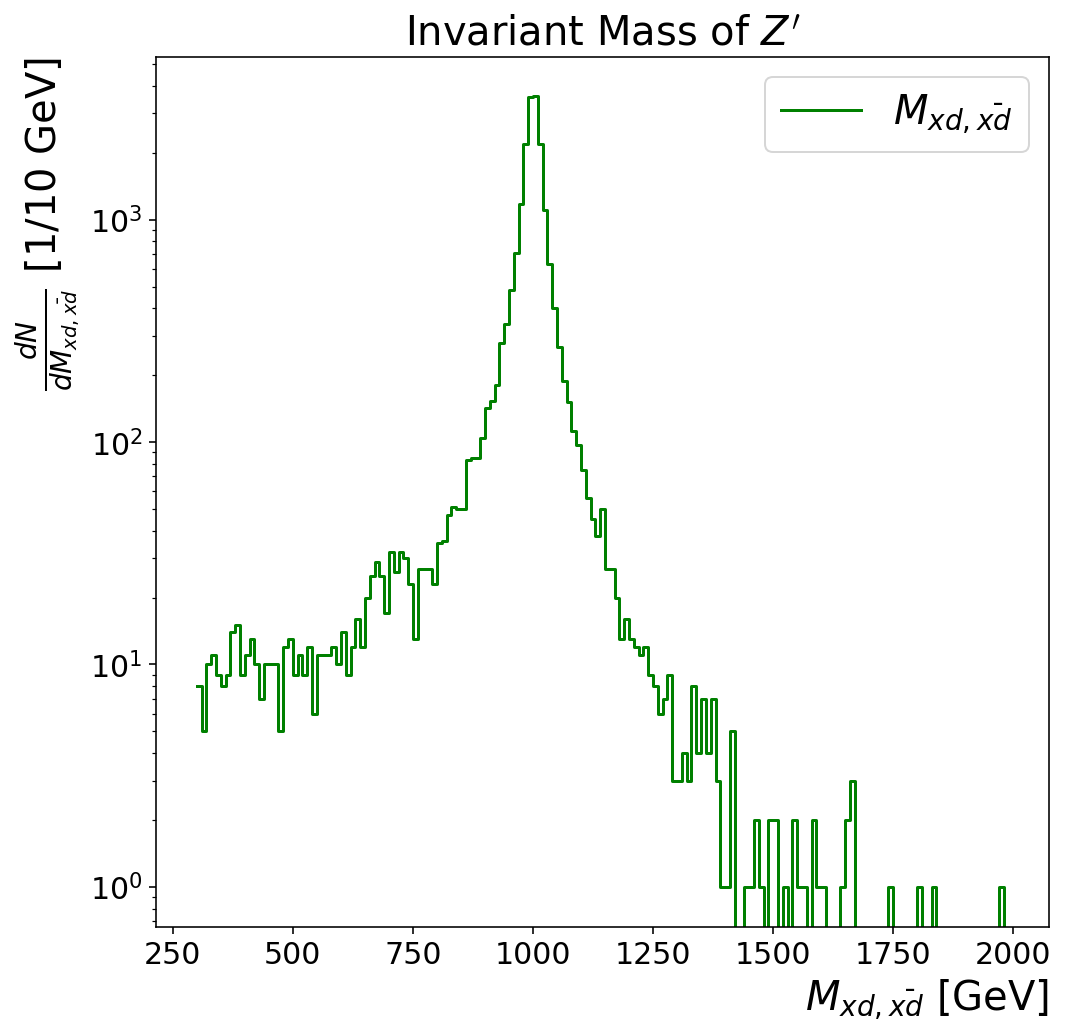

In [27]:
plt.figure(figsize=(8,8))  # plot size

bin_size = np.linspace(300,2000,171)
hist, bins = np.histogram(m_1000, bins=bin_size)

plt.step(bins[:-1], hist, where='post', color='green', label='$M_{xd,\\bar{xd}}$')

plt.legend(fontsize=20)
plt.yscale('log')
plt.title('Invariant Mass of $Z^\prime$', fontsize=20)
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dM_{xd,\\bar{xd}}}$ [1/10 GeV]', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Note: average invariant mass, total event number, and area of diagram

In [28]:
sum(m_1000)/nevents_1000

977.5791418324721

In [29]:
print(sum(hist))
bin_size = np.linspace(0,2700,271)
hist, bins = np.histogram(m_1000, bins=bin_size)
print(sum(hist))

19811
20000


### 3. $M_{Z^\prime}=2000$ GeV

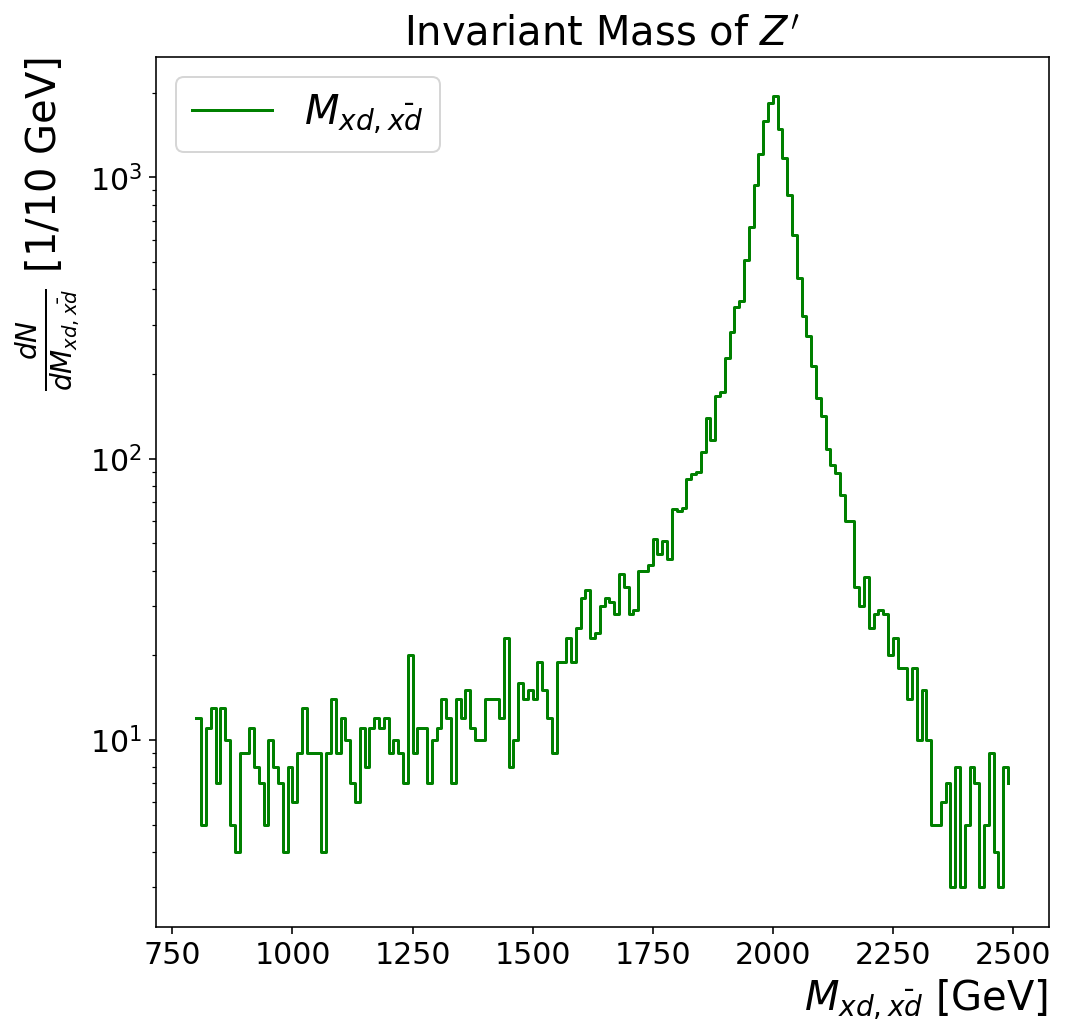

In [54]:
plt.figure(figsize=(8,8))  # plot size

bin_size = np.linspace(800,2500,171)
hist, bins = np.histogram(m_2000, bins=bin_size)

plt.step(bins[:-1], hist, where='post', color='green', label='$M_{xd,\\bar{xd}}$')

plt.legend(fontsize=20)
plt.yscale('log')
plt.title('Invariant Mass of $Z^\prime$', fontsize=20)
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dM_{xd,\\bar{xd}}}$ [1/10 GeV]', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Note: average invariant mass, total event number, and area of diagram

In [55]:
sum(m_2000)/nevents_2000

1913.4048534686037

In [56]:
print(sum(hist))
bin_size = np.linspace(0,5700,571)
hist, bins = np.histogram(m_2000, bins=bin_size)
print(sum(hist))

19286
20000


### 4. $M_{Z^\prime}=100000$ GeV

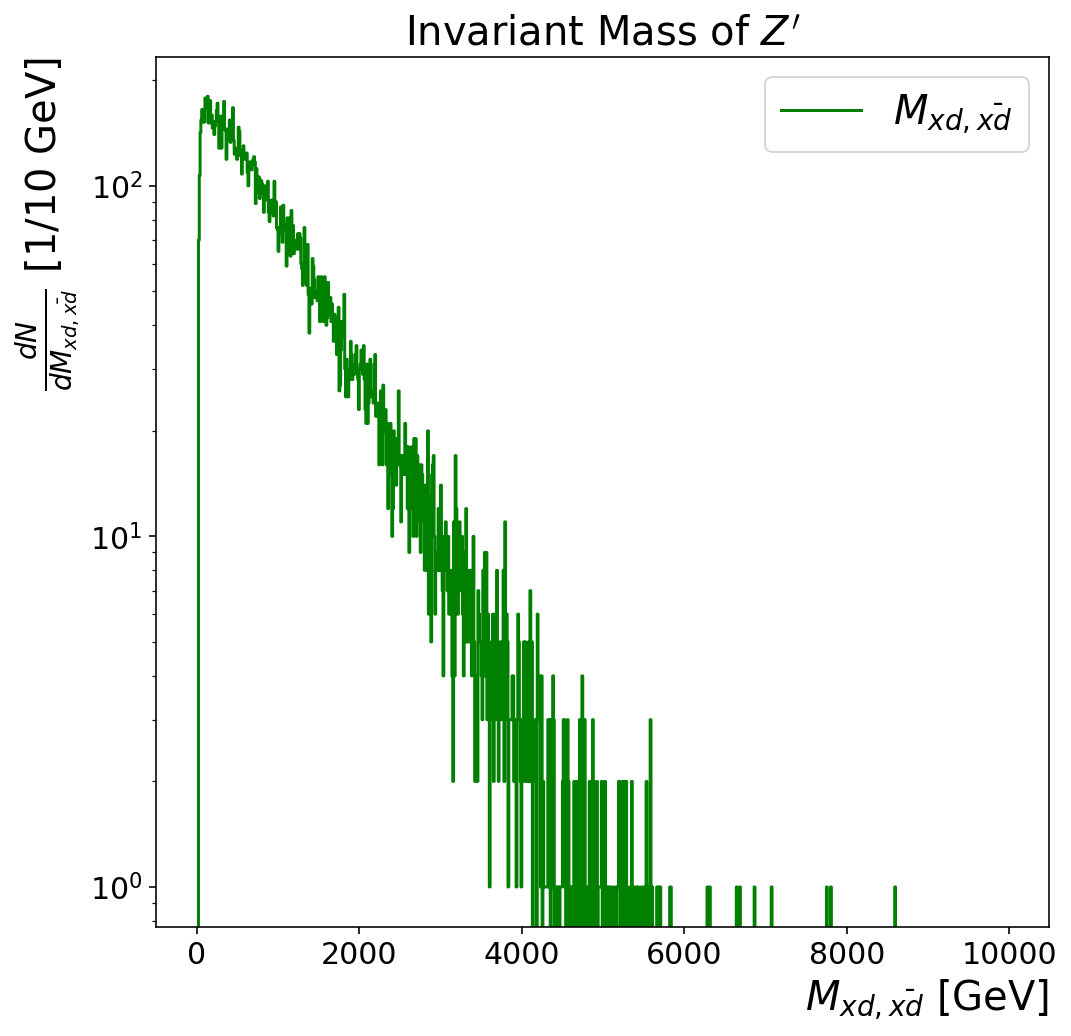

In [57]:
plt.figure(figsize=(8,8))  # plot size

bin_size = np.linspace(0,10000,1001)
hist, bins = np.histogram(m_100000, bins=bin_size)

plt.step(bins[:-1], hist, where='post', color='green', label='$M_{xd,\\bar{xd}}$')

plt.legend(fontsize=20)
plt.yscale('log')
plt.title('Invariant Mass of $Z^\prime$', fontsize=20)
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dM_{xd,\\bar{xd}}}$ [1/10 GeV]', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Note: average invariant mass, total event number, and area of diagram

In [58]:
sum(m_100000)/nevents_100000

1008.4947326887559

In [59]:
print(sum(hist))

20000


In [60]:
print(hist)

[  0   0  70 107 142 154 165 152 155 152 178 168 167 180 151 165 175 151
 159 146 152 140 148 153 164 172 153 128 152 158 128 145 147 174 146 144
 119 145 135 136 154 133 136 142 167 135 123 128 124 119 128 147 143 122
 126 108 122 130 120 119 120 124 109 100 116 117 117 111 115 119 121 117
  89 112  96 102 106  92 104 103 101  95  84 100  91  96  94 103  84  79
  86  91  84  91  82 103  83  90  76  75  65  76  73  87  81  69  88  75
  78  77  59  81  64  79  81  63  85  68  77  64  70  66  69  66  73  66
  73  71  60  58  52  53  76  63  55  52  68  49  38  51  51  46  62  59
  54  48  50  49  47  55  55  41  45  55  48  41  54  55  42  40  42  53
  43  45  48  41  46  41  36  43  39  42  33  41  45  26  27  34  41  37
  39  49  30  25  32  29  25  28  30  36  33  28  29  29  31  33  35  29
  28  23  30  31  34  32  29  35  28  23  21  31  21  24  27  32  25  26
  26  24  31  33  22  22  24  23  16  19  26  24  16  27  20  21  23  16
  21  12  20  20  21  15  10  12  20  15  18  14  1